In [94]:

from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
#matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
import math 
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm1
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d, Axes3D
pd.set_option('display.float_format', lambda x: '%.3f' % x)

def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',',decimal='.')
    return dataset

dataset = load_dataset('smart_grid_stability_augmented.csv')
dataset.loc[dataset['stabf'] == 'stable', "stabf"] = 1
dataset.loc[dataset['stabf'] == 'unstable', "stabf"] = 0
data = dataset.values
dataset
y = data[:,-1]
x = data[:, :13]


In [95]:
print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (60000, 14)
Dimensionalitat de les entrades X (60000, 13)
Dimensionalitat de l'atribut Y (60000,)


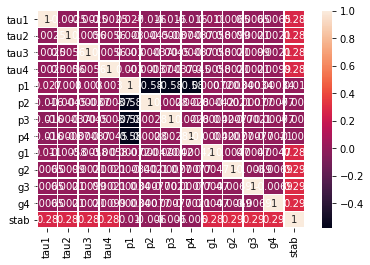

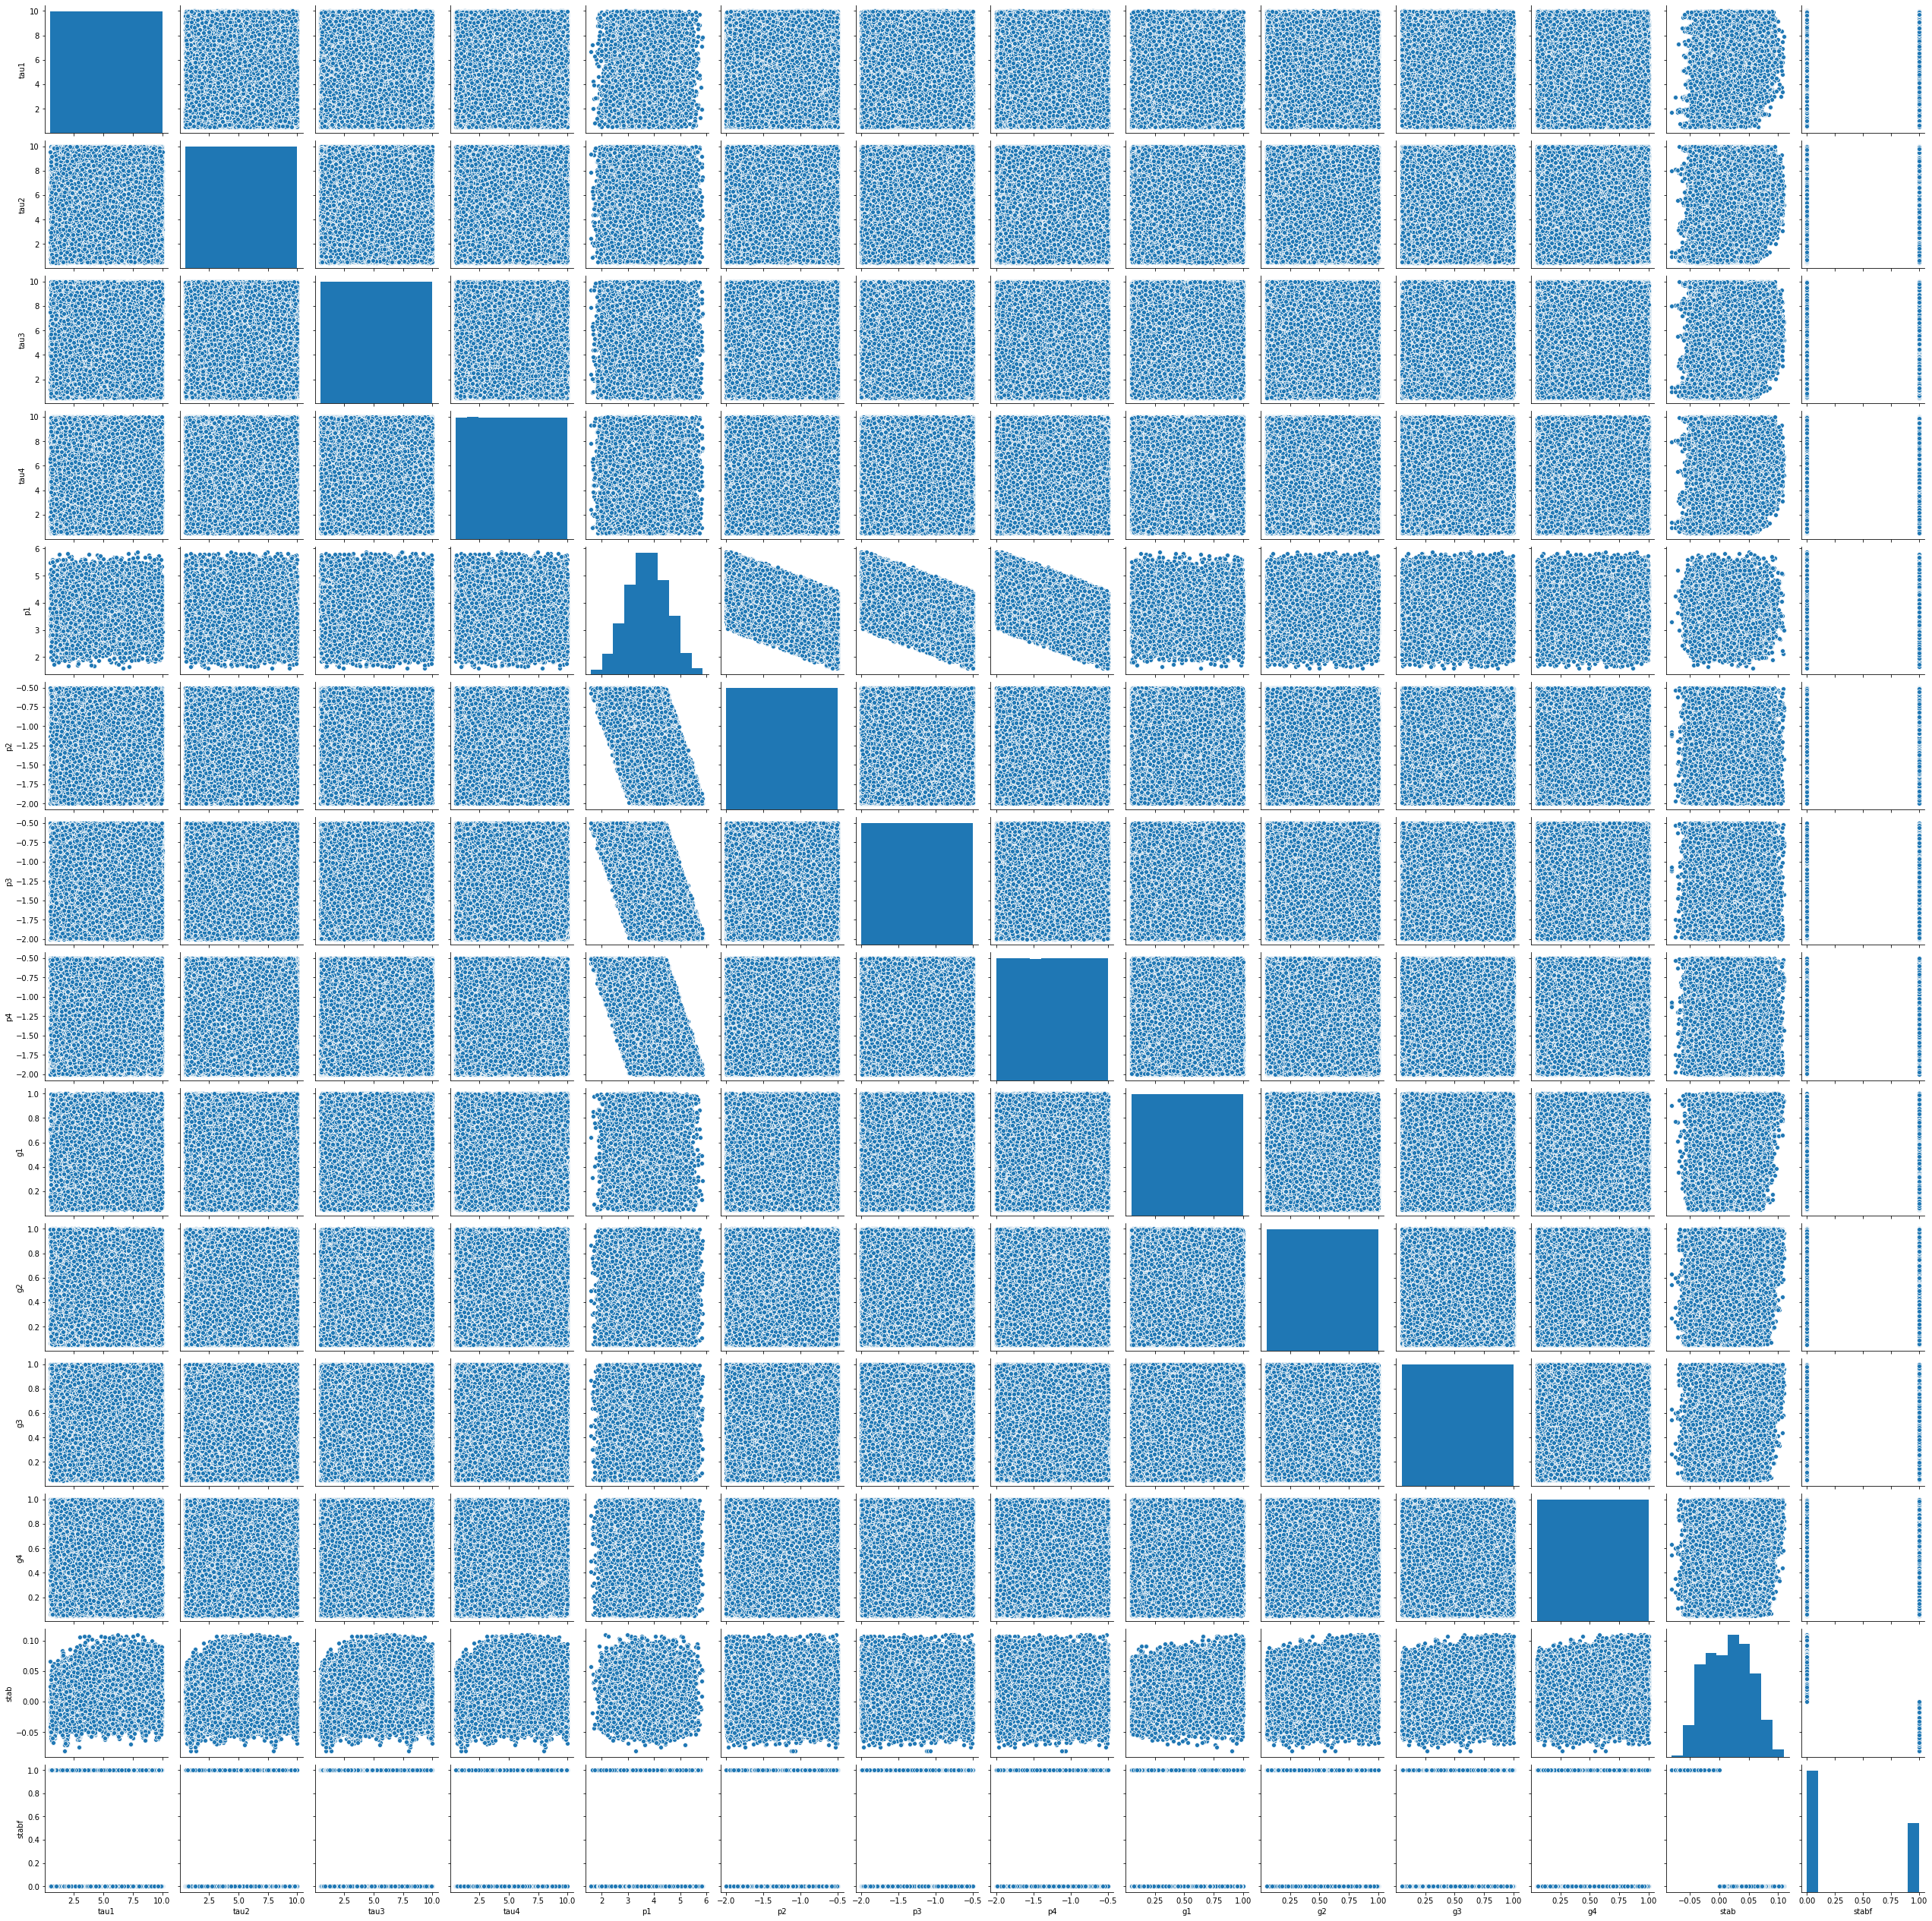

In [108]:
plt.figure()
ax = sns.heatmap(dataset.corr(), annot=True, linewidths=.5)
relacio = sns.pairplot(dataset)


Obvervem que el valor a preedir es el stab

In [99]:
from sklearn.linear_model import LinearRegression

def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

def mse(v1, v2):
    return ((v1 - v2)**2).mean()

Mean squeared error:  0.21821252569653293
R2 score:  0.05517706534348388


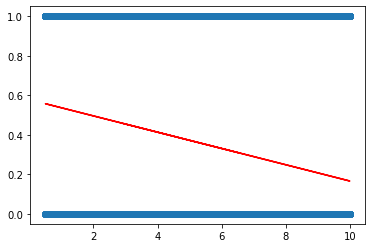

In [100]:
from sklearn.metrics import r2_score

atribut1 = x[:,0].reshape(x.shape[0], 1) 
regr = regression(atribut1, y) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(x[:,0], y)
plt.plot(atribut1[:,0], predicted, 'r')

# Mostrem l'error (MSE i R2)
MSE = mse(y, predicted)
r2 = r2_score(y, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)

In [109]:
def split_data(x, y, train_ratio=0.8):
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    indices_val = indices[n_train:] 
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_val, y_val

# Dividim dades d'entrenament
x_train, y_train, x_val, y_val = split_data(x, y)

for i in range(x_train.shape[1]):
    x_t = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_v = x_val[:,i] # seleccionem atribut i en conjunt de val.
    x_t = np.reshape(x_t,(x_t.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))

    regr = regression(x_t, y_train)    
    error = mse(y_val, regr.predict(x_v)) # calculem error
    r2 = r2_score(y_val, regr.predict(x_v))

    print("Error en atribut %d: %f" %(i, error))
    print("R2 score en atribut %d: %f" %(i, r2))

Error en atribut 0: 0.219729
R2 score en atribut 0: 0.052708
Error en atribut 1: 0.218342
R2 score en atribut 1: 0.058688
Error en atribut 2: 0.219526
R2 score en atribut 2: 0.053580
Error en atribut 3: 0.217632
R2 score en atribut 3: 0.061746
Error en atribut 4: 0.231933
R2 score en atribut 4: 0.000093
Error en atribut 5: 0.231954
R2 score en atribut 5: 0.000001
Error en atribut 6: 0.231955
R2 score en atribut 6: -0.000002
Error en atribut 7: 0.232002
R2 score en atribut 7: -0.000202
Error en atribut 8: 0.223945
R2 score en atribut 8: 0.034531
Error en atribut 9: 0.221035
R2 score en atribut 9: 0.047076
Error en atribut 10: 0.220569
R2 score en atribut 10: 0.049084
Error en atribut 11: 0.222045
R2 score en atribut 11: 0.042721
Error en atribut 12: 0.073897
R2 score en atribut 12: 0.681417
